In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("nursery.data",
                   names=["parents", "has_nurs", "form", "children","housing","finance","social","health","class_values"]) 


In [3]:
data.head(5)

parents has_nurs      form children     housing     finance         social  \
0   usual   proper  complete        1  convenient  convenient        nonprob   
1   usual   proper  complete        1  convenient  convenient        nonprob   
2   usual   proper  complete        1  convenient  convenient        nonprob   
3   usual   proper  complete        1  convenient  convenient  slightly_prob   
4   usual   proper  complete        1  convenient  convenient  slightly_prob   

        health class_values  
0  recommended    recommend  
1     priority     priority  
2    not_recom    not_recom  
3  recommended    recommend  
4     priority     priority

## Write a small paragraph describing the dataset that you choose, its features, number of instances, nature of the data, and anything else that you found to be interesting.

In [4]:
print(data.shape)

(12960, 9)


Nursery Database was derived from a hierarchical decision model originally developed to rank applications for nursery schools. The dataset contains 12960 data rows, and 8 features/ 1 class attribute. Based on the attributes, we can train a model to classify whether a child should be recommended to a nursery, not recommended, etc. 

class:

not_recom, recommend, very_recom, priority, spec_prior

attributes:

parents:     usual, pretentious, great_pret.
has_nurs:    proper, less_proper, improper, critical, very_crit.
form:        complete, completed, incomplete, foster.
children:    1, 2, 3, more.
housing:     convenient, less_conv, critical.
finance:     convenient, inconv.
social:      nonprob, slightly_prob, problematic.
health:      recommended, priority, not_recom.

## Provide a brief analysis of the dataset you downloaded. Does it have missing data? Are the features numeric/discrete/categorical? Create some histograms/boxplots/other visualizations to illustrate the content o the dataset. 

In [5]:
data.describe()

parents  has_nurs    form children    housing     finance  \
count        12960     12960   12960    12960      12960       12960   
unique           3         5       4        4          3           2   
top     great_pret  improper  foster        3  less_conv  convenient   
freq          4320      2592    3240     3240       4320        6480   

             social       health class_values  
count         12960        12960        12960  
unique            3            3            5  
top     problematic  recommended    not_recom  
freq           4320         4320         4320

The attribute / class features are categorical

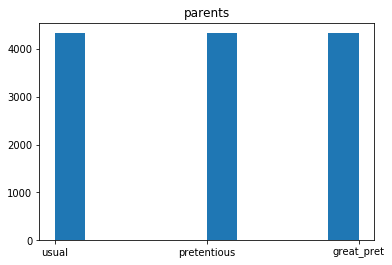

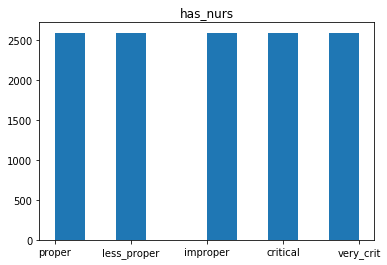

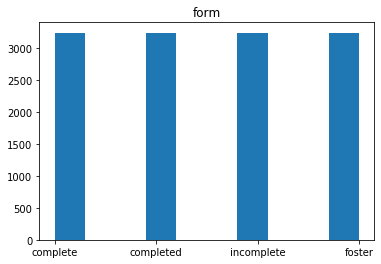

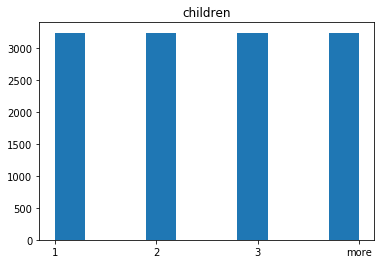

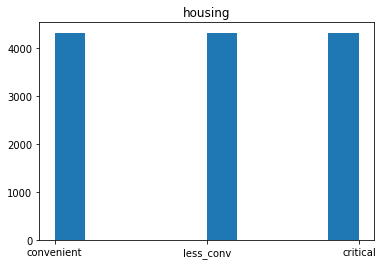

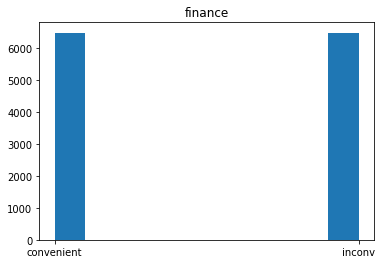

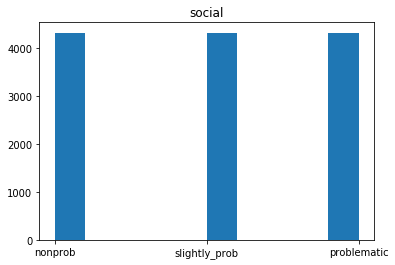

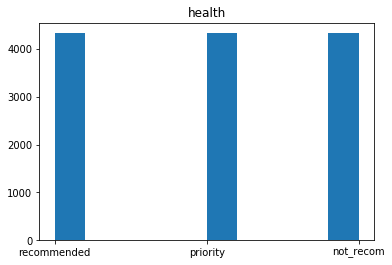

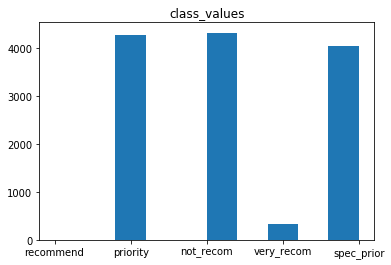

In [6]:
for column in data.columns:
    plt.hist(data[column])
    plt.title(column)
    plt.show()

After going through the histogram, we see that for all the attribute values, they are pretty equally distributed across the dataset. However, for the classes, we see that the dataset is skewed.

In [7]:
for column in data.columns:
    if data[column].isna().any():
        print(column +" has missing data")
    else:
        print(column +" does not have missing data")

parents does not have missing data
has_nurs does not have missing data
form does not have missing data
children does not have missing data
housing does not have missing data
finance does not have missing data
social does not have missing data
health does not have missing data
class_values does not have missing data


The dataset does not contain any missing data

In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
enc = LabelEncoder()

In [10]:
data_encoded = data.apply(LabelEncoder().fit_transform)

In [11]:
data_encoded.head(5)

parents  has_nurs  form  children  housing  finance  social  health  \
0        2         3     0         0        0        0       0       2   
1        2         3     0         0        0        0       0       1   
2        2         3     0         0        0        0       0       0   
3        2         3     0         0        0        0       2       2   
4        2         3     0         0        0        0       2       1   

   class_values  
0             2  
1             1  
2             0  
3             2  
4             1

Since the Dataset attributes are categorical, we need to label them, so that the classifier can build a decision tree on it correctly. 

## Using scikit-learn’s DecisionTreeClassifier, train a supervised learning model that can be used to generate predicions for your data.

In [12]:
from sklearn.model_selection import train_test_split
import sklearn.tree as tree

In [13]:
X = data_encoded.drop('class_values', 1)
y = data_encoded['class_values']

In [14]:
print(X.shape)
print(y.shape)

(12960, 8)
(12960,)


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8)

In [16]:
model = tree.DecisionTreeClassifier()
# training the model
model.fit(X_train, y_train)


# calculate train and test errors
tr_acc = model.score(X_train, y_train)
te_acc = model.score(X_test, y_test)

print("\n Train Accuracy  = " + str(tr_acc))
print("\n Test Accuracy  = " + str(te_acc))


 Train Accuracy  = 1.0

 Test Accuracy  = 0.9934413580246914


## The link above explains how you can generate a visual output for the tree you just trained. Use that code snippet to create a visualization of your tree.

In [17]:
import graphviz
import pydotplus
from IPython.display import Image

In [18]:
dot_data = tree.export_graphviz(model, out_file=None, 
                         feature_names=["parents", "has_nurs", "form", "children","housing","finance","social","health"],  
                         class_names=["not_recom", "recommend", "very_recom", "priority", "spec_prior"],  
                         filled=True, rounded=True,  
                         special_characters=True)  
# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())

## Create a new instance with your choice of values for each of the features. Use your trained model to generate a prediction for it. Using your tree illustration as a reference, write a short paragraph describing how your model went about generating that specific prediction. Does it make sense to you? Can it be improved? Go back and play with the parameters that you used for training your tree and see if you can obtain better results.

In [19]:
random_data = data_encoded.iloc[5:6,0:8]
actual = data_encoded.iloc[5:6,8:]

print("Data :- \n")
print(random_data)

print("\nLabel :- \n")
print(actual.to_string(index = False))

Data :- 

   parents  has_nurs  form  children  housing  finance  social  health
5        2         3     0         0        0        0       2       0

Label :- 

 class_values
            0


In [20]:
prediction = model.predict(random_data)

In [21]:
print(prediction)

[0]


We see that the prediction by our model is correct.


Now, the path followed by the classifier in the above decision tree is :- Root Node (classification is based on health) -> Left Child (leaf node) :- class = not_recommended ( non - encoded ) 

Now, we can use multiple methods for parameter tuning on our model such as GridSearchCV / RandomizedSearchCV / etc. Here, we will be using GridSearchCV

In [22]:
# Setup the parameters and distributions to sample from: param_dist

from sklearn.model_selection import GridSearchCV
from random import randint

param_dict = {"max_depth": [3,4,5,6,7,8,9],
              "criterion": ["gini", "entropy"],'max_features': [2,4,5,6,8]}

grid_dt = GridSearchCV(estimator=model,param_grid=param_dict,scoring='accuracy',cv=10)
grid_dt.fit(X_train, y_train)

# calculate train and test errors
tr_acc = grid_dt.score(X_train, y_train)
te_acc = grid_dt.score(X_test, y_test)

print('Best hyerparameters:\n' , grid_dt.best_params_)
print("\n Train Accuracy  = " + str(tr_acc))
print("\n Test Accuracy  = " + str(te_acc))

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


Best hyerparameters:
 {'criterion': 'entropy', 'max_depth': 9, 'max_features': 8}

 Train Accuracy  = 0.9594907407407407

 Test Accuracy  = 0.9618055555555556


Here, we see that performance tuning has reduced the accuracy of our model. The original decision tree model has an accuracy score of 99.41. Thus, we do not require performance tuning on our current model.
